# Yudi Xiao
# Final Project: House Price Competition

In [6]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import matplotlib.pyplot as plt 

In [19]:
df=pd.read_csv("house_truncated(2).csv")
df.head()

,MSZoning,LotArea,Street,Neighborhood,BldgType,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice
0,RL,8450,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,2,Normal,208500
1,RL,9600,Pave,Veenker,1Fam,6,8,MetalSd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,5,Normal,181500
2,RL,11250,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,9,Normal,223500
3,RL,9550,Pave,Crawfor,1Fam,7,5,Wd Sdng,TA,TA,...,272,0,0,NaN,NaN,NaN,0,2,Abnorml,140000
4,RL,14260,Pave,NoRidge,1Fam,8,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,12,Normal,250000


In [20]:
df

,MSZoning,LotArea,Street,Neighborhood,BldgType,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice
0,RL,8450,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,2,Normal,208500
1,RL,9600,Pave,Veenker,1Fam,6,8,MetalSd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,5,Normal,181500
2,RL,11250,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,9,Normal,223500
3,RL,9550,Pave,Crawfor,1Fam,7,5,Wd Sdng,TA,TA,...,272,0,0,NaN,NaN,NaN,0,2,Abnorml,140000
4,RL,14260,Pave,NoRidge,1Fam,8,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,12,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,Gilbert,1Fam,6,5,VinylSd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,8,Normal,175000
1456,RL,13175,Pave,NWAmes,1Fam,6,6,Plywood,TA,TA,...,0,0,0,NaN,MnPrv,NaN,0,2,Normal,210000
1457,RL,9042,Pave,Crawfor,1Fam,7,9,CemntBd,Ex,Gd,...,0,0,0,NaN,GdPrv,Shed,2500,5,Normal,266500
1458,RL,9717,Pave,NAmes,1Fam,5,6,MetalSd,TA,TA,...,112,0,0,NaN,NaN,NaN,0,4,Normal,142125


# 1. Introduction

a. What question are you answering with your project?

My final project focuses on the house price competition. Generally, the dependent variables I chose is SalePrice of each individual house and there are 80 predictors in the original dataset named 'House Price Competition' from Kaggle. I deleted several predictors which has less connection with the dependent variable 'SalePrice' or contains bunch of 'NA' values. My project would answer the question what are some major factors which determine the House price and how these factor relates to the HousePrice.

b. Why should we care about this question?

House Price has always been a hot topic over years even though we thought the real estate bonus period has passed away in many countries like China. However, as far as I seen in the U.S, the rent and the house price in LA after the pandemic still rise up at a considerable percentage. Therefore, understanding the determing factors of the house price from my project would definitely give you a clear insight of the real estate industry and it will be helpful when you are planning to purchase the real estate in the future.

c. Have there been previous papers in the economics literature addressing this question? Summarize previous research briefly.

Yuying Wu, and Youshan Zhang wrote a paper named "House Price Predicition Based on Deep Learning". According to their paper,due tothe emergence of long-term rental apartment intermediary platforms like eggshell, which is raising tenants' sense of uncertainty, as well as current urbanization and the struggle for people in large cities, future real estate market competition will be more intense. To gain a better understanding of real estate prices, allow consumers to acquire a home at a reasonable price, and give a benchmark for the government to establish policies.

# 2. Data

a. Describe the source(s) of the data.

The source of my data comes from the Kaggle dataset named "House Price Competition". It collected 1460 individual houses' information through original 80 predictor variables. I removed several predictors ends up down to 56 predictors in the dataset due to less correlated to SalePrice of the house and 'NA' value. Predictors in the dataset are 'Neighborhood','LotArea' etc...

b. Discuss whether you are removing any outliers from your data, or doing any other sampling restrictions.

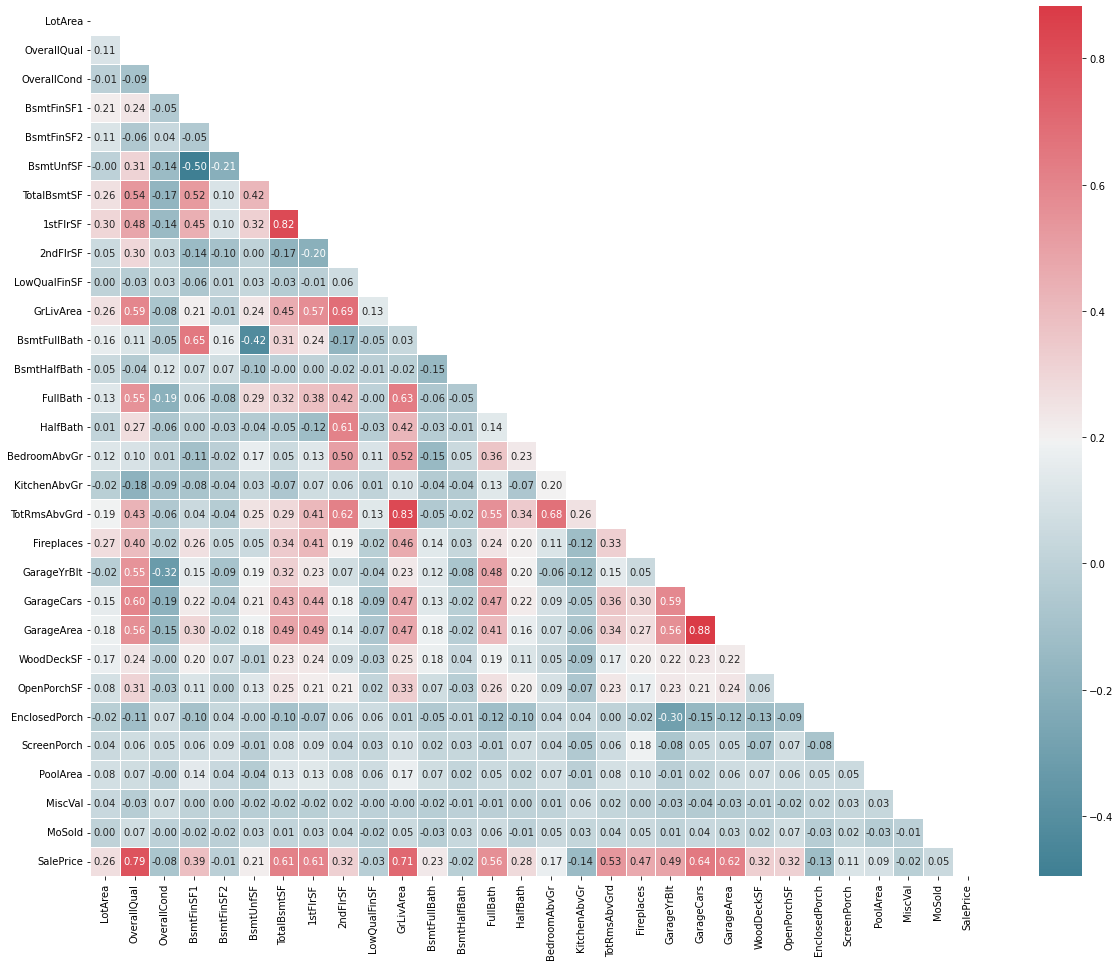

In [18]:
corr = house.corr()
fig, ax = plt.subplots(figsize=(20, 16))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

Firstly, I chose 8 most important independent variables based on the correlation graph above and my selections are Choose GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath as numeric variables because these 6 variables have the top 6 pairwise correlation with SalePrice, and BldgType and SaleCondition as non-numeric variables because these two variables are important for determining the price of a house.

Removing outliers

In [22]:
print("Highest allowed",df['GrLivArea'].mean() + 3*df['GrLivArea'].std())
print("Lowest allowed",df['GrLivArea'].mean() - 3*df['GrLivArea'].std())

Highest allowed 3091.904848899745
Lowest allowed -60.977451639471155


In [24]:
df[(df['GrLivArea'] > 3091.904848899745) | (df['GrLivArea'] < -60.977451639471155)]

,MSZoning,LotArea,Street,Neighborhood,BldgType,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice
118,RL,12376,Pave,SawyerW,1Fam,7,5,Plywood,TA,TA,...,0,0,0,NaN,NaN,NaN,0,5,Normal,320000
185,RM,22950,Pave,OldTown,1Fam,10,9,Wd Sdng,Gd,Gd,...,0,410,0,NaN,GdPrv,NaN,0,6,Normal,475000
197,RL,25419,Pave,NAmes,1Fam,8,4,Stucco,Gd,Gd,...,552,0,512,Ex,GdPrv,NaN,0,3,Abnorml,235000
304,RM,18386,Pave,OldTown,1Fam,7,9,CemntBd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,5,Normal,295000
496,RL,12692,Pave,NoRidge,1Fam,8,5,BrkFace,Gd,TA,...,291,0,0,NaN,NaN,NaN,0,5,Normal,430000
523,RL,40094,Pave,Edwards,1Fam,10,5,CemntBd,Ex,TA,...,0,0,0,NaN,NaN,NaN,0,10,Partial,184750
608,RL,12168,Pave,Crawfor,1Fam,8,6,BrkFace,TA,TA,...,0,0,0,NaN,NaN,NaN,0,9,Alloca,359100
635,RH,10896,Pave,SWISU,2fmCon,6,7,VinylSd,Fa,TA,...,0,0,0,NaN,NaN,NaN,0,3,Abnorml,200000
691,RL,21535,Pave,NoRidge,1Fam,10,6,HdBoard,Ex,TA,...,0,0,0,NaN,NaN,NaN,0,1,Normal,755000
769,RL,53504,Pave,StoneBr,1Fam,8,5,CemntBd,Ex,TA,...,0,210,0,NaN,NaN,NaN,0,6,Normal,538000


I removed the outliers of variable 'GrLivarea' because if the outliers exists, they may affect the regression model. The interpretion of the model may not valid.

In [25]:
new_df = df[(df['GrLivArea'] < 3091.904848899745) | (df['GrLivArea'] > -60.977451639471155)]
new_df

,MSZoning,LotArea,Street,Neighborhood,BldgType,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice
0,RL,8450,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,2,Normal,208500
1,RL,9600,Pave,Veenker,1Fam,6,8,MetalSd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,5,Normal,181500
2,RL,11250,Pave,CollgCr,1Fam,7,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,9,Normal,223500
3,RL,9550,Pave,Crawfor,1Fam,7,5,Wd Sdng,TA,TA,...,272,0,0,NaN,NaN,NaN,0,2,Abnorml,140000
4,RL,14260,Pave,NoRidge,1Fam,8,5,VinylSd,Gd,TA,...,0,0,0,NaN,NaN,NaN,0,12,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,Gilbert,1Fam,6,5,VinylSd,TA,TA,...,0,0,0,NaN,NaN,NaN,0,8,Normal,175000
1456,RL,13175,Pave,NWAmes,1Fam,6,6,Plywood,TA,TA,...,0,0,0,NaN,MnPrv,NaN,0,2,Normal,210000
1457,RL,9042,Pave,Crawfor,1Fam,7,9,CemntBd,Ex,Gd,...,0,0,0,NaN,GdPrv,Shed,2500,5,Normal,266500
1458,RL,9717,Pave,NAmes,1Fam,5,6,MetalSd,TA,TA,...,112,0,0,NaN,NaN,NaN,0,4,Normal,142125


In [26]:
print("Highest allowed",df['GarageCars'].mean() + 3*df['GarageCars'].std())
print("Lowest allowed",df['GarageCars'].mean() - 3*df['GarageCars'].std())

Highest allowed 4.009068318004568
Lowest allowed -0.474821742662102


In [27]:
df[(df['GarageCars'] > 4.009068318004568) | (df['GarageCars'] < -0.474821742662102)]

,MSZoning,LotArea,Street,Neighborhood,BldgType,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,...,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice


No outliers for variable 'GarageCars'

c. Discuss whether you are transforming the data and/or merging/appending multiple datasets together.

For my project, I transformed two unnumerical variables BldgType and SaleCondition into dummy variables because these two variables are siginificant to dependent variables 'SalePrice'.

In [42]:
df_Sale = pd.get_dummies(df['SaleCondition'])
df1 = pd.concat([df, df_Sale], axis=1)
df1.drop(['SaleCondition', 'Family'], inplace=True, axis=1)
df_Bldg = pd.get_dummies(df['BldgType'])
df1 = pd.concat([df1, df_Bldg], axis=1)
df1.drop(['BldgType', 'Twnhs'], inplace=True, axis=1)
df1

,MSZoning,LotArea,Street,Neighborhood,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,Foundation,...,SalePrice,Abnorml,AdjLand,Alloca,Normal,Partial,1Fam,2fmCon,Duplex,TwnhsE
0,RL,8450,Pave,CollgCr,7,5,VinylSd,Gd,TA,PConc,...,208500,0,0,0,1,0,1,0,0,0
1,RL,9600,Pave,Veenker,6,8,MetalSd,TA,TA,CBlock,...,181500,0,0,0,1,0,1,0,0,0
2,RL,11250,Pave,CollgCr,7,5,VinylSd,Gd,TA,PConc,...,223500,0,0,0,1,0,1,0,0,0
3,RL,9550,Pave,Crawfor,7,5,Wd Sdng,TA,TA,BrkTil,...,140000,1,0,0,0,0,1,0,0,0
4,RL,14260,Pave,NoRidge,8,5,VinylSd,Gd,TA,PConc,...,250000,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,Gilbert,6,5,VinylSd,TA,TA,PConc,...,175000,0,0,0,1,0,1,0,0,0
1456,RL,13175,Pave,NWAmes,6,6,Plywood,TA,TA,CBlock,...,210000,0,0,0,1,0,1,0,0,0
1457,RL,9042,Pave,Crawfor,7,9,CemntBd,Ex,Gd,Stone,...,266500,0,0,0,1,0,1,0,0,0
1458,RL,9717,Pave,NAmes,5,6,MetalSd,TA,TA,CBlock,...,142125,0,0,0,1,0,1,0,0,0


In [48]:
df2=pd.get_dummies(df, columns=['BldgType', 'SaleCondition'], drop_first=True)
df2.head()

,MSZoning,LotArea,Street,Neighborhood,OverallQual,OverallCond,Exterior1st,ExterQual,ExterCond,Foundation,...,SalePrice,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,RL,8450,Pave,CollgCr,7,5,VinylSd,Gd,TA,PConc,...,208500,0,0,0,0,0,0,0,1,0
1,RL,9600,Pave,Veenker,6,8,MetalSd,TA,TA,CBlock,...,181500,0,0,0,0,0,0,0,1,0
2,RL,11250,Pave,CollgCr,7,5,VinylSd,Gd,TA,PConc,...,223500,0,0,0,0,0,0,0,1,0
3,RL,9550,Pave,Crawfor,7,5,Wd Sdng,TA,TA,BrkTil,...,140000,0,0,0,0,0,0,0,0,0
4,RL,14260,Pave,NoRidge,8,5,VinylSd,Gd,TA,PConc,...,250000,0,0,0,0,0,0,0,1,0


d. Show comprehensive summary statistics.
Remember: summary statistics are a very important part of all applied work!

# GrLivArea

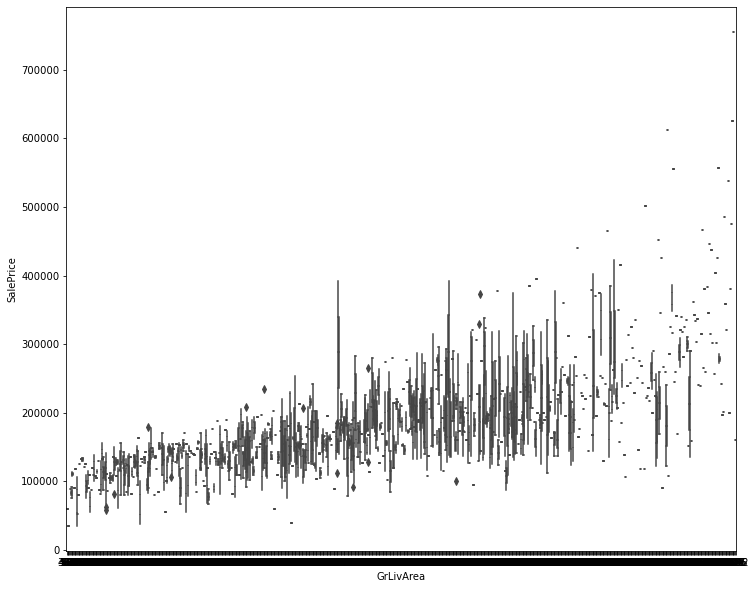

In [40]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='GrLivArea', y="SalePrice", data=df)

# GarageCars

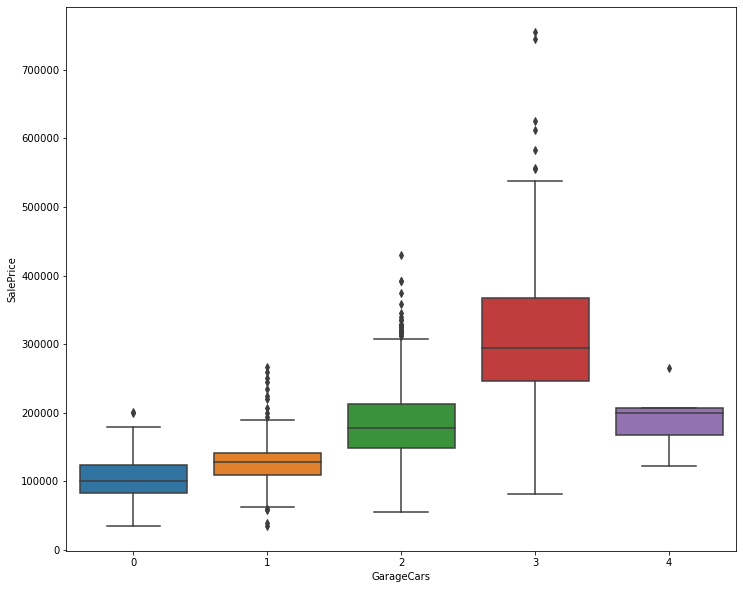

In [39]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=df)

# GarageArea

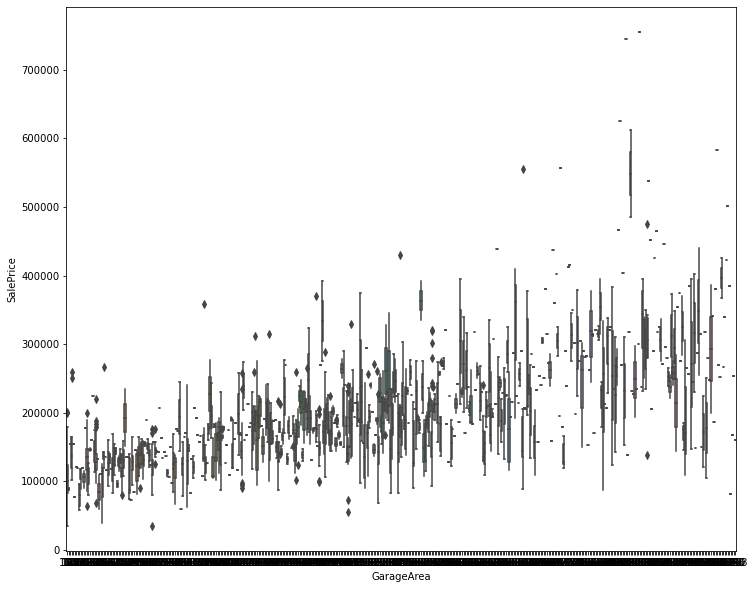

In [38]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='GarageArea', y="SalePrice", data=df)

# TotalBsmtSF

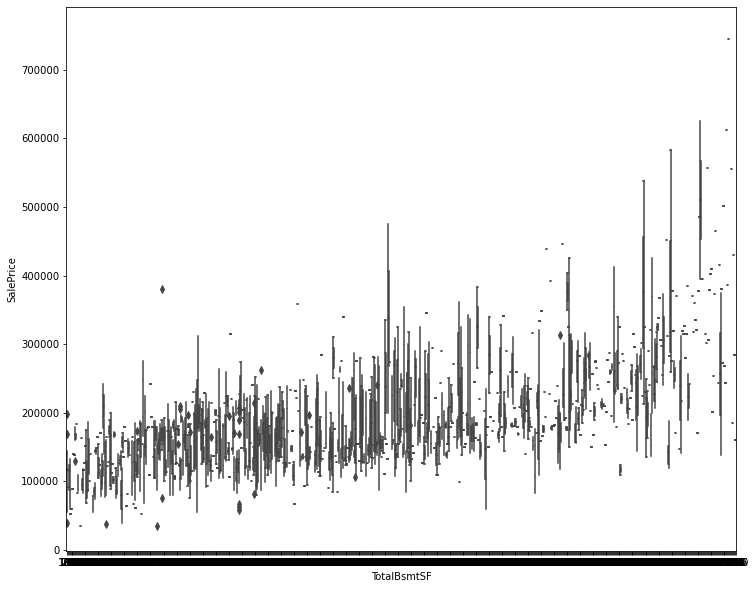

In [37]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='TotalBsmtSF', y="SalePrice", data=df)

# 1stFlrSF

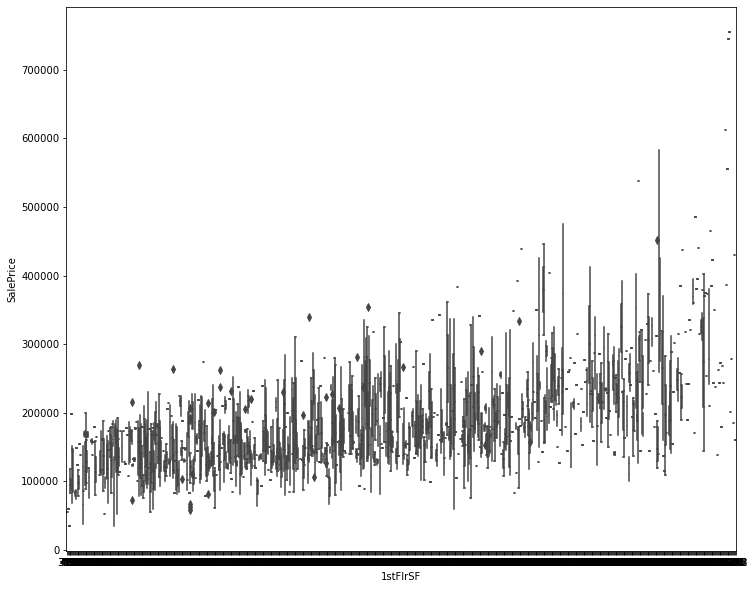

In [36]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='1stFlrSF', y="SalePrice", data=df)

# FullBath

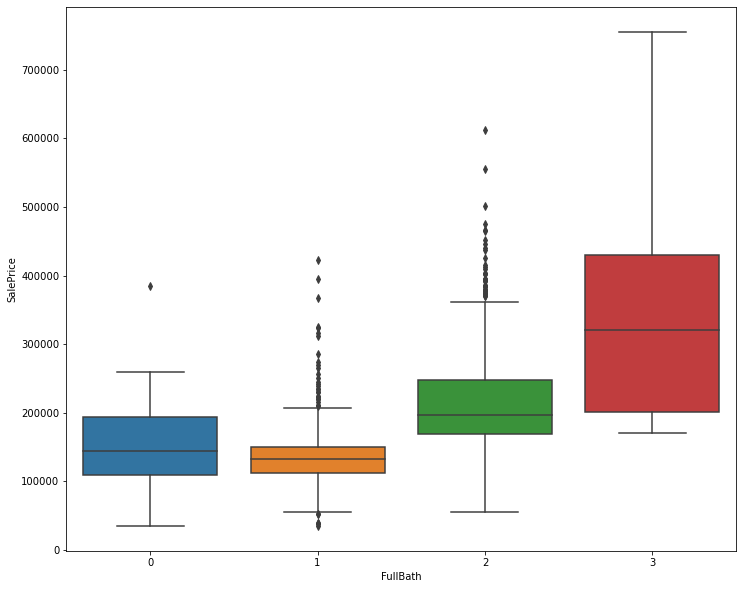

In [35]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=df)

# BldgType

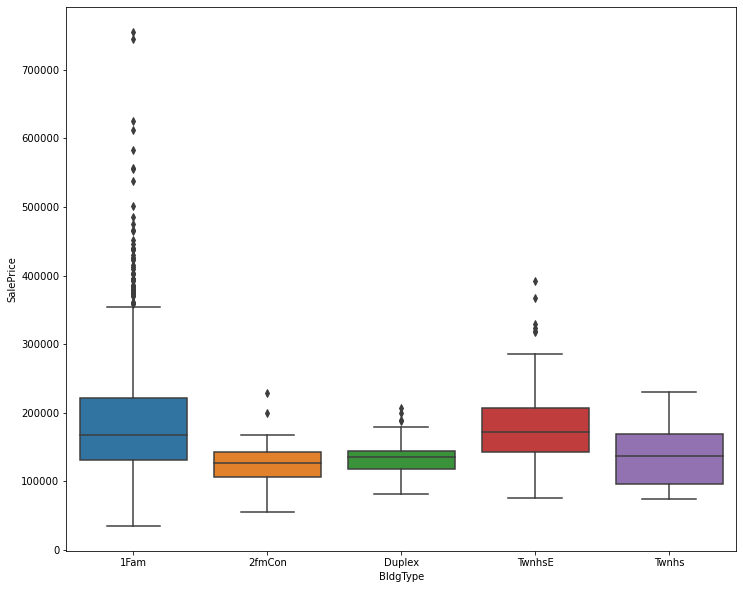

In [34]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='BldgType', y="SalePrice", data=df)

# SaleCondition

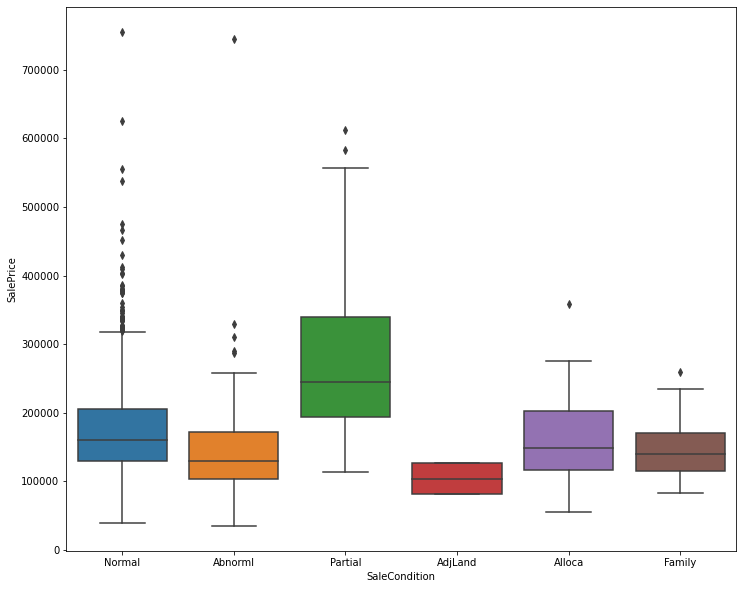

In [41]:
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x='SaleCondition', y="SalePrice", data=df)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   Street         1460 non-null   object 
 3   Neighborhood   1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   Exterior1st    1460 non-null   object 
 7   ExterQual      1460 non-null   object 
 8   ExterCond      1460 non-null   object 
 9   Foundation     1460 non-null   object 
 10  BsmtQual       1423 non-null   object 
 11  BsmtCond       1423 non-null   object 
 12  BsmtExposure   1422 non-null   object 
 13  BsmtFinType1   1423 non-null   object 
 14  BsmtFinSF1     1460 non-null   int64  
 15  BsmtFinType2   1422 non-null   object 
 16  BsmtFinSF2     1460 non-null   int64  
 17  BsmtUnfSF      1460 non-null   int64  
 18  TotalBsm

In [45]:
df1.describe()

,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SalePrice,Abnorml,AdjLand,Alloca,Normal,Partial,1Fam,2fmCon,Duplex,TwnhsE
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,180921.195890,0.069178,0.002740,0.008219,0.820548,0.085616,0.835616,0.021233,0.035616,0.078082
std,9981.264932,1.382997,1.112799,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,79442.502883,0.253844,0.052289,0.090317,0.383862,0.279893,0.370750,0.144209,0.185395,0.268393
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,129975.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,9478.500000,6.000000,5.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,163000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11601.500000,7.000000,6.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,214000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,215245.000000,10.000000,9.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
SalePriceCount = len(pd.unique(df['SalePrice']))
print("Numbers of unique values in SalePrice :", SalePriceCount)
SaleConditionCount = len(pd.unique(df['SaleCondition']))
print("Numbers of unique values in SaleCondition :", SaleConditionCount)
BldgTypeCount = len(pd.unique(df['BldgType']))
print("Numbers of unique values in BldgType :", BldgTypeCount)
GarageAreaCount = len(pd.unique(df['GarageArea']))
print("Numbers of unique values in GarageArea :", GarageAreaCount)
oneFlrSFCount = len(pd.unique(df['1stFlrSF']))
print("Numbers of unique values in 1stFlrSF :", oneFlrSFCount)
GrLivAreaCount = len(pd.unique(df['GrLivArea']))
print("Numbers of unique values in GrLivArea :", GrLivAreaCount)
GarageCarsCount = len(pd.unique(df['GarageCars']))
print("Numbers of unique values in GarageCars :", GarageCarsCount)
TotalBsmtSFCount = len(pd.unique(df['TotalBsmtSF']))
print("Numbers of unique values in TotalBsmtSF :", TotalBsmtSFCount)
FullBathCount = len(pd.unique(df['FullBath']))
print("Numbers of unique values in ExterCond :", FullBathCount)

Numbers of unique values in SalePrice : 663
Numbers of unique values in SaleCondition : 6
Numbers of unique values in BldgType : 5
Numbers of unique values in GarageArea : 441
Numbers of unique values in 1stFlrSF : 753
Numbers of unique values in GrLivArea : 861
Numbers of unique values in GarageCars : 5
Numbers of unique values in TotalBsmtSF : 721
Numbers of unique values in ExterCond : 4


#### q-q plot

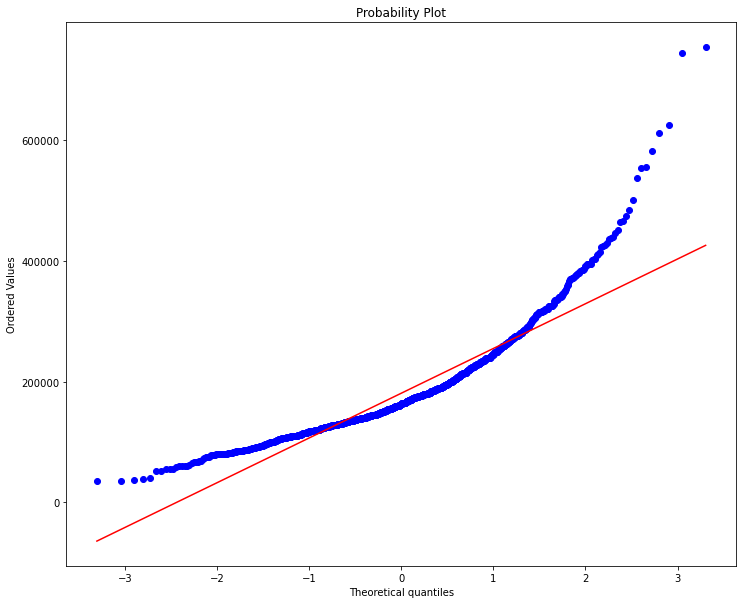

In [50]:
f, ax = plt.subplots(figsize=(12, 10))
# qq=sm.qqplot(house['SalePrice'], line = '45', fit = True)
_, (__, ___, r) = sp.stats.probplot(df['SalePrice'], plot = ax, fit=True)

#### Histogram

Text(0.5, 0, 'Sale Price')

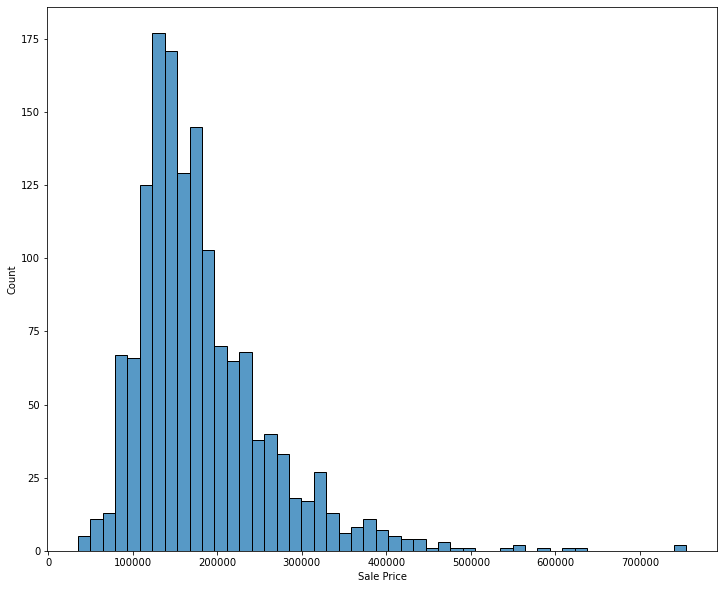

In [51]:
f, ax = plt.subplots(figsize=(12, 10))
sns.histplot(df['SalePrice'])
plt.xlabel('Sale Price')

From the above figures, the distribution of SalePrice is not normal distribution.

# 3: Modeling

a. Analyze the data using 2-3 different model specifications (i.e. with/without covariates, using different definitions of the treatment, outcome, or predictor variables, etc.)
Remember: complicated models are not necessarily better than simple models. There is nothing wrong with OLS regression if that’s the best model.

#### Model 1: with dummy variables

In [52]:
import statsmodels.api as sm
from statsmodels.api import add_constant
y = df1['SalePrice']
X = df1[['GarageArea','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','Abnorml','AdjLand','Alloca','Normal','Partial','1Fam','2fmCon','Duplex','TwnhsE']]
X = sm.add_constant(X)
ols_fit = sm.OLS(y, X).fit()
print(ols_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     244.6
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        23:19:49   Log-Likelihood:                -17621.
No. Observations:                1460   AIC:                         3.527e+04
Df Residuals:                    1444   BIC:                         3.536e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.687e+04    1.2e+04     -4.745      

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


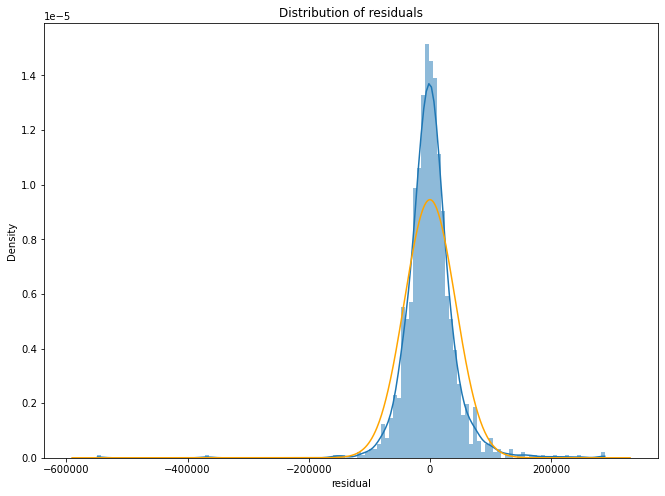

In [53]:
from scipy import stats
mu, std = stats.norm.fit(ols_fit.resid)
mu, std
fig, ax = plt.subplots(figsize=(11,8))
# plot the residuals
sns.histplot(x=ols_fit.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 1000) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

#### Model2: log(SalePrice)

In [62]:
df1['logu2'] = np.log(df1['SalePrice'])
y = df1['logu2']
X = df1[['GarageArea','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','Abnorml','AdjLand','Alloca','Normal','Partial','1Fam','2fmCon','Duplex','TwnhsE']]
X = sm.add_constant(X)
ols_fit_a = sm.OLS(y, X).fit()
print(ols_fit_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  logu2   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     280.6
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        23:29:21   Log-Likelihood:                 264.86
No. Observations:                1460   AIC:                            -497.7
Df Residuals:                    1444   BIC:                            -413.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.7644      0.057    187.815      

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:ylabel='Count'>

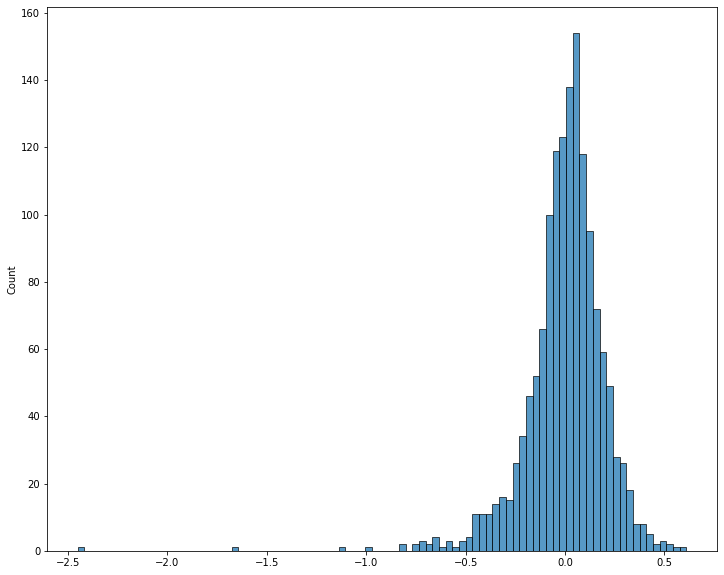

In [59]:
f, ax = plt.subplots(figsize=(12, 10))
sns.histplot(ols_fit_a.resid)

#### Model3: With interaction term between the number of GarageCars and SaleCondition_Partial and higher order term for 'GrLivArea'.

The interaction term between the number of GarageCars and SaleCondition Partial is what I chose. Since we can see from the previous graph, partial selling conditions are always associated with higher prices. We can also see from the graph that when there are partial and four garage automobiles, the sale price is higher. As a result, as interaction terms, I chose GarageCars and SaleCondition Partial. GrLivArea was chosen as the high order polynoial word because, as shown in the graph, it is positively connected with Sale Price but only marginally linearly correlated.

In [63]:
X = df1[['GarageArea','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','Abnorml','AdjLand','Alloca','Normal','Partial','1Fam','2fmCon','Duplex','TwnhsE']]
X['GarageCars:SaleCondition_Partial']=X['GarageCars']*X['Partial']
X['GrLivArea**2']=X['GrLivArea']**2
X=sm.add_constant(X)
Y=np.log(df2['SalePrice'])
ols_fit_b = sm.OLS(y, X).fit()
print(ols_fit_b.summary())

                            OLS Regression Results                            
Dep. Variable:                  logu2   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     291.0
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        23:29:35   Log-Likelihood:                 355.31
No. Observations:                1460   AIC:                            -674.6
Df Residuals:                    1442   BIC:                            -579.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

C:\Users\yudi\AppData\Local\Temp/ipykernel_6744/1274996534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GarageCars:SaleCondition_Partial']=X['GarageCars']*X['Partial']
C:\Users\yudi\AppData\Local\Temp/ipykernel_6744/1274996534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GrLivArea**2']=X['GrLivArea']**2
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x

<AxesSubplot:ylabel='Count'>

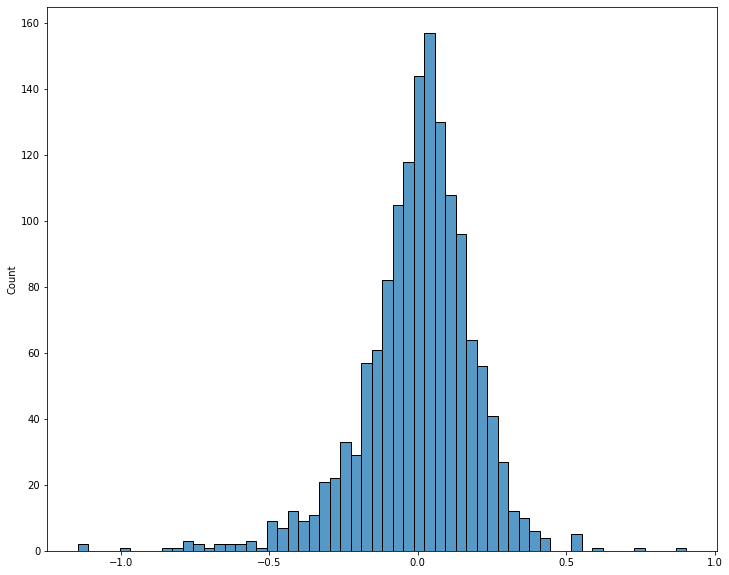

In [58]:
f, ax = plt.subplots(figsize=(12, 10))
sns.histplot(ols_fit_b.resid)

Based on three models above, I conclude that model 3 is the best one because of the R^2 is the highest which is 0.774 which means the model interprets the 77.4% of the data.

# 4. Findings

a. What are your main findings?

Overall, my main findings is that variable 'AdjLand' has the stongest positive relationship with SalePrice. 'Adjland' means that Adjoining Land Purchase. When 'AdjLand' goes up by 1, the SalePrice will go up by 0.2327 based on the model 3 above which is the best model among these three models. In addition, dummy variable 'Duplex ' has the strongest negative relationship with SalePrice. 'Duplex' is a type of dwelling. When 'Duplex ' goes up by 1, the SalePrice will go down by -0.1930.

b. Are your findings robust to different model specifications?

Personally, I think my findings are robust to different model specifications because all the models are valid, outliers of independent variables removed and the errors of all models are acceptable.

# 5. Conclusion

a. Discuss what we’ve learned from your analysis.

Based on my analysis, when you are willing to purchase the house in the future, you need to pay attention to the Adjoining Land Purchase factor of the house you are interested because it's the strongest positive factor of one house. You should also pay attention to the duplex, the type of the dwelling. It has the stongest nagative feedback on house price.

b. Discuss any questions that could be answered in the future.

There are several questions: 1: Does relationship between independent variables affect the SalePrice?
2: Could we do some advanced linear regressions like ridge regression or Lasso regression in the future for the SalePrice?
3: Could we do some non-linear regression for the SalePrice?